In [1]:
import mysql.connector
import pandas as pd
from mysql.connector import Error

## Reading data

In [2]:
def connect_to_database(hostname, user, password, db_name):
    
    connection = None
    try:
        connection = mysql.connector.connect(
            host = hostname,
            user = user,
            passwd = password,
            database = db_name
        )
        print("Connection to database: '%s' successfull."%db_name)
    except Error as err:
        print("ERROR: %s" % err)
    
    return connection

In [7]:
def read_query(connection, query):
    cursor = connection.cursor()
    results = None
    try:
        cursor.execute(query)
        results = cursor.fetchall()
        print("Query successfully executed")
        return results
    except Error as err:
        print("ERROR !\n%s"%err)

1. Establish a connection to the database

In [9]:
connection = connect_to_database(
    hostname = "localhost",
    user = "root",
    password = "Bora@1992",
    db_name = "school"
)

Connection to database: 'school' successfull.


2. Once the connection is successfull, run the query:

In [16]:
query = "SELECT * FROM teachers;"

results = read_query(connection, query)
for result in results:
    print(result)

Query successfully executed
(1, 'Luke', 'Thomas')
(2, 'Gabriel', 'Moon')
(3, 'Dawn', 'Barron')
(4, 'Suzanne', 'Jones')
(5, 'Brian', 'Waters')
(6, 'Shannon', 'Harvey')
(7, 'Michelle', 'Young')
(8, 'Shawn', 'Mosley')
(9, 'Julia', 'Smith')
(10, 'Stacy', 'Lewis')


## Explanatory data analysis

Number of students in the school:

In [19]:
query = '''
    SELECT COUNT(*) FROM students;    
'''
read_query(connection, query)

Query successfully executed


[(300,)]

Number of courses offered in the school:

In [20]:
query = '''
    SELECT COUNT(*) FROM courses;    
'''
read_query(connection, query)

Query successfully executed


[(30,)]

Find the most popular course:

In [28]:
query = '''
SELECT
  course_name,
  COUNT(student_id) AS num_students
FROM classroom JOIN courses
ON classroom.course_id = courses.id
GROUP BY course_id
ORDER BY num_students DESC LIMIT 5;
'''
read_query(connection, query)

Query successfully executed


[('Ball Ltd', 219),
 ('Smith LLC', 213),
 ('Farrell-Bates', 211),
 ('Collins, Neal and Fischer', 209),
 ('Knight, Taylor and King', 209)]

Busiest teacher

In [51]:
query = '''
SELECT
  CONCAT(
    teachers.first_name,
    " ",
    teachers.last_name
  ) as teacher_name,
  COUNT(courses.id) as num_courses
FROM courses RIGHT JOIN teachers
ON teachers.id = courses.teacher_id
GROUP BY teachers.id
ORDER BY num_courses DESC;
'''
read_query(connection, query)

Query successfully executed


[('Luke Thomas', 8),
 ('Julia Smith', 6),
 ('Gabriel Moon', 4),
 ('Brian Waters', 4),
 ('Shannon Harvey', 4),
 ('Shawn Mosley', 2),
 ('Michelle Young', 1),
 ('Stacy Lewis', 1),
 ('Dawn Barron', 0),
 ('Suzanne Jones', 0)]

Idle teachers:

In [52]:
query = '''
SELECT
  CONCAT(
    teachers.first_name,
    " ",
    teachers.last_name
  ) as teacher_name,
  COUNT(courses.id) AS num_courses
FROM courses RIGHT JOIN teachers
ON courses.teacher_id = teachers.id
GROUP BY teachers.id
HAVING num_courses = 0;
'''
read_query(connection, query)

Query successfully executed


[('Dawn Barron', 0), ('Suzanne Jones', 0)]

Most courses enrolled by a student

In [54]:
query = '''
SELECT
  CONCAT(
    students.first_name,
    " ",
    students.last_name
  ) AS student,
  COUNT(classroom.course_id) AS num_courses
FROM students JOIN classroom
ON students.id = classroom.student_id
GROUP BY students.id
ORDER BY num_courses DESC LIMIT 10;

'''
read_query(connection, query)

Query successfully executed


[('Anthony Russell', 26),
 ('Derek Perkins', 26),
 ('Alicia Boone', 26),
 ('Sandra Robertson', 26),
 ('Megan James', 25),
 ('Monica Gray', 25),
 ('Rebecca Barnett', 25),
 ('Bradley Wade', 25),
 ('Mackenzie James', 25),
 ('Jorge Johnston', 25)]

Minimum courses enrolled:

In [56]:
query = '''
SELECT
  CONCAT(
    students.first_name,
    " ",
    students.last_name
  ) AS student,
  COUNT(classroom.course_id) AS num_courses
FROM students JOIN classroom
ON students.id = classroom.student_id
GROUP BY students.id
ORDER BY num_courses LIMIT 10;

'''
results = read_query(connection, query)
results

Query successfully executed


[('Haley Fisher', 12),
 ('Jennifer Kelley', 13),
 ('Leah Bailey', 14),
 ('John Turner', 14),
 ('Fred Conner', 15),
 ('James Riggs', 15),
 ('Tara Smith', 15),
 ('Dustin Peters', 15),
 ('Jo Lee', 15),
 ('Bethany Carpenter', 16)]

<AxesSubplot:xlabel='Name'>

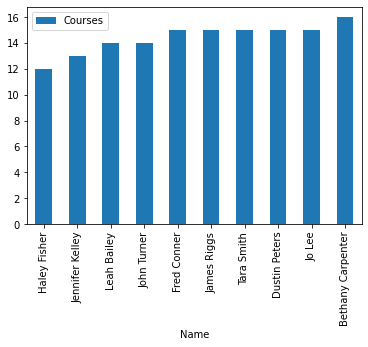

In [62]:
df = pd.DataFrame(results, columns=["Name", "Courses"])
df.plot(kind="bar", x="Name", y="Courses")